### Введение
С развитием LLM-моделей спрашивать теоретическую часть или короткие алгоритмы и принципы стало бесполезно, поэтому задание будет одно, но комплексное и приближенное к реальности.

Вы можете использовать любые LLM-модели и Copilot для написания кода, так как в реальной работе сотрудники отдела также имеют доступ ко всем современным инструментам (Sonnet 3.5, GPT-4o, GitHub Copilot и т. п.).

В задании вы будете работать с тестовыми данными по банкоматам и API ЦБ РФ для получения ключевой ставки.

---

### Специфика данных fees
`fees` — тарифы за обслуживание банкомата инкассаторами. Так как банкоматы могут находиться в разных регионах, тарифы у них могут отличаться.

- **CashDeliveryFixedFee** — фиксированная стоимость доставки наличных (не зависит от суммы).
- **CashDeliveryPercentageFee** — процент от суммы доставленных наличных. Он добавляется к фиксированной стоимости. Если в таблице указано `0.0001`, это значит 0.01% от суммы.
- **CashDeliveryMinFee** — минимальная сумма, которую с нас возьмут по `CashDeliveryPercentageFee`. Например, если мы попросим инкассаторов в ATM_4 довезти всего 10 000 рублей, то с нас возьмут 5250 рублей (фиксированная стоимость), а так как `10 000 * 0.04% < 450 рублей`, то дополнительно возьмут ещё 450 рублей. Итог: 5250 + 450 рублей.

**CashCollection** — это пример сложного тарифа, который учитывает специфику работы с банкоматом. В банкомат деньги не докладывают, а меняют сразу кассету. Есть провайдеры, которые тарифицируют не только доставку, но и пересчёт денег в извлечённой кассете. Например, в ATM_4 у нас именно такой тариф.  
Пример: у нас в банкомате осталось 500 тыс. рублей, а мы хотим, чтобы у него был баланс 2 млн. Тогда мы заказываем довезти кассету на 2 млн. и платим по тарифу за доставку. При доставке старая кассета извлекается, и мы также по тарифу платим за пересчёт 500 тыс. рублей (0.45%, но не менее 1140 рублей).

- **CashCollectionFixedFee** — фиксированная стоимость за извлечение старой кассеты (в данных примерах нулевая).
- **CashCollectionPercentageFee** — процент от суммы извлечённой кассеты.
- **CashCollectionMinFee** — минимальная сумма, которую с нас возьмут по `CashCollectionPercentageFee`.

---

### Специфика данных transactions
Таблица содержит данные по снятиям, пополнениям (инкассациям) и балансу банкомата на конец дня.  
Считаем, что банкоматы в начале года пустые и не работали, поэтому баланс на конец дня равен 0, пока не случится первая инкассация.

- **bal_end_of_day** — баланс на конец дня.
- **cash_in** — пополнение в результате инкассации.
- **cash_out** — снятие наличных клиентами.

---

### Часть 1 — упущенный процентный доход

Специалисту по ML важно уметь получать данные с различных API и читать документацию. Для расчёта упущенного процентного дохода нужно обратиться к API ЦБ РФ и получить динамику ключевой ставки за 2024 год.

https://www.cbr.ru/DailyInfoWebServ/DailyInfo.asmx?op=KeyRate

Для запроса к API не нужен токен и регистрация. ЦБ РФ для части данных предпочитает использовать SOAP.

Учитывая, что хранить наличные деньги в банкомате — не самое удачное инвестиционное решение, посчитайте упущенный процентный доход для каждого банкомата. Рассчитываем, что банк мог бы вложить эти деньги и получить доход, равный ключевой ставке ЦБ РФ, актуальной на день баланса банкомата. Добавьте к таблице `transactions` столбец с упущенной процентной выгодой.


### Часть 2 - расходы на инкассацию

Теперь к данным по банкоматам, кроме упущенного процентного дохода, необходимо добавить столбец расходов на инкассацию. Для простоты считаем, что мы не платим за аренду помещения и страхование, поэтому нам достаточно данных по тарифам на инкассацию (`fees`).

### Часть 3 - анализ данных

Посмотрите на данные о снятиях, инкассациях и балансе. В данных подобраны банкоматы, отличающиеся по характеру использования и частоте инкассаций.  
(Эту операцию вы делаете для себя, чтобы лучше понять специфику.)

### Часть 4 - меняем бизнес с помощью ML

Заключительная и самая интересная часть. К данному этапу у нас уже рассчитан упущенный процентный доход и расходы на инкассацию. Подумайте, как использовать ваши знания, чтобы оптимизировать процесс инкассации и уменьшить издержки.

Для данной задачи считаем, что нас устроит Service Level на уровне 90%. Это значит, что если в 9 из 10 случаев наши клиенты получают нужные им суммы, нас это устраивает.

Напоминаем, что технически в банкомат нельзя довнести сумму, и кассета меняется полностью. Соответственно, с нас берут оплату за полную кассету (если вдруг решите подойти к задаче через классическую формулу EOQ).

Вы можете подойти к задаче абсолютно любым способом и использовать все возможности ООП, Python и любых библиотек. Всё как в реальной работе, где вас никто не ограничивает.

Эффективность своего решения вы можете показать с помощью ретротестирования. Считаем, что каждая кассета может вмещать абсолютно любые суммы. Чтобы добавить реализма, вы можете считать, что деньги нужно заказывать за 3 дня до их доставки.


### Заключение

Решение вы можете предоставить любым способом: репозиторий GitHub, Google Colab, конвертированный IPython Notebook в PDF и т. п.

По срокам вас не ограничивают, но учитывайте, что в это же время задачу могут решать и другие кандидаты. Таким образом, вы участвуете в конкурсе с ними.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from zeep import Client
pd.set_option('display.max_rows', None)
import math
from scipy.stats import norm

In [2]:
# Забираем данные по тарфиам на обслуживание банкоматов
fees = pd.read_parquet('https://storage.yandexcloud.net/norvpublic/fees.parquet')
# статистика операция по дням.
transactions = pd.read_parquet('https://storage.yandexcloud.net/norvpublic/transactions.parquet')

In [3]:
fees

,ATM_ID,CashDeliveryFixedFee,CashDeliveryPercentageFee,CashDeliveryMinFee,CashCollectionFixedFee,CashCollectionPercentageFee,CashCollectionMinFee
0,ATM_1,1365.0,0.0001,NaN,NaN,NaN,NaN
1,ATM_2,1365.0,0.0001,NaN,NaN,NaN,NaN
2,ATM_4,5250.0,0.0004,450.0,0.0,0.0045,1140.0
3,ATM_3,2250.0,0.0001,675.0,NaN,NaN,NaN


In [4]:
transactions.loc[transactions.ATM_ID == "ATM_1"]

,date,ATM_ID,bal_end_of_day,cash_in,cash_out
0,2024-01-12 00:00:00+00:00,ATM_1,0.0,0.0,0.0
4,2024-01-13 00:00:00+00:00,ATM_1,0.0,0.0,0.0
8,2024-01-14 00:00:00+00:00,ATM_1,0.0,0.0,0.0
12,2024-01-15 00:00:00+00:00,ATM_1,0.0,0.0,0.0
16,2024-01-16 00:00:00+00:00,ATM_1,0.0,0.0,0.0
20,2024-01-17 00:00:00+00:00,ATM_1,0.0,0.0,0.0
24,2024-01-18 00:00:00+00:00,ATM_1,0.0,0.0,0.0
28,2024-01-19 00:00:00+00:00,ATM_1,0.0,0.0,0.0
32,2024-01-20 00:00:00+00:00,ATM_1,0.0,0.0,0.0
36,2024-01-21 00:00:00+00:00,ATM_1,0.0,0.0,0.0


# Часть 1

In [5]:
#начальная дата
transactions.date.min()

Timestamp('2024-01-12 00:00:00+0000', tz='Etc/UTC')

In [6]:
#конечная дата
transactions.date.max()

Timestamp('2024-10-31 00:00:00+0000', tz='Etc/UTC')

In [7]:

# считаем данные о КС ЦБРФ
from zeep import Client

# Подключаемся к WSDL
wsdl_url = "https://www.cbr.ru/DailyInfoWebServ/DailyInfo.asmx?WSDL"
client = Client(wsdl_url)

try:
    # Запрашиваем данные
    response = client.service.KeyRate("2024-01-12", "2024-10-31")
except Exception as e:
    print(f"Ошибка: {e}")
    
key_rate_data = response['_value_1']['_value_1']

key_rate_df = pd.DataFrame([{'Date': item['KR']['DT'], 'Rate': item['KR']['Rate']} for item in key_rate_data])
key_rate_df.columns = ["date", "key_rate"]

key_rate_df

Forcing soap:address location to HTTPS
Forcing soap:address location to HTTPS


,date,key_rate
0,2024-10-31 00:00:00+03:00,21.00
1,2024-10-30 00:00:00+03:00,21.00
2,2024-10-29 00:00:00+03:00,21.00
3,2024-10-28 00:00:00+03:00,21.00
4,2024-10-25 00:00:00+03:00,19.00
5,2024-10-24 00:00:00+03:00,19.00
6,2024-10-23 00:00:00+03:00,19.00
7,2024-10-22 00:00:00+03:00,19.00
8,2024-10-21 00:00:00+03:00,19.00
9,2024-10-18 00:00:00+03:00,19.00


In [8]:
key_rate_df.value_counts()

date                       key_rate
2024-01-12 00:00:00+03:00  16.00       1
2024-08-02 00:00:00+03:00  18.00       1
2024-07-19 00:00:00+03:00  16.00       1
2024-07-22 00:00:00+03:00  16.00       1
2024-07-23 00:00:00+03:00  16.00       1
2024-07-24 00:00:00+03:00  16.00       1
2024-07-25 00:00:00+03:00  16.00       1
2024-07-26 00:00:00+03:00  16.00       1
2024-07-29 00:00:00+03:00  18.00       1
2024-07-30 00:00:00+03:00  18.00       1
2024-07-31 00:00:00+03:00  18.00       1
2024-08-01 00:00:00+03:00  18.00       1
2024-08-05 00:00:00+03:00  18.00       1
2024-07-17 00:00:00+03:00  16.00       1
2024-08-06 00:00:00+03:00  18.00       1
2024-08-07 00:00:00+03:00  18.00       1
2024-08-08 00:00:00+03:00  18.00       1
2024-08-09 00:00:00+03:00  18.00       1
2024-08-12 00:00:00+03:00  18.00       1
2024-08-13 00:00:00+03:00  18.00       1
2024-08-14 00:00:00+03:00  18.00       1
2024-08-15 00:00:00+03:00  18.00       1
2024-08-16 00:00:00+03:00  18.00       1
2024-08-19 00:00:00+0

Замерджим ставку в df transactions для удобства

In [9]:
# в столбцах date оставим только год месяц и день
transactions.date = transactions.date.apply(str).apply(lambda x: x.split()[0]) 
key_rate_df.date = key_rate_df.date.apply(str).apply(lambda x: x.split()[0])

transactions = transactions.merge(key_rate_df, on="date", how="left")
print("Кол-ва nan:", transactions.isna().sum())

Кол-ва nan: date                0
ATM_ID              0
bal_end_of_day      0
cash_in             0
cash_out            0
key_rate          352
dtype: int64


In [10]:
# заполним nan ближайшими предыдущими значениями

transactions.key_rate = transactions.key_rate.fillna(method='ffill')
print("Кол-ва nan:", transactions.isna().sum())

Кол-ва nan: date              0
ATM_ID            0
bal_end_of_day    0
cash_in           0
cash_out          0
key_rate          0
dtype: int64


In [11]:
transactions

,date,ATM_ID,bal_end_of_day,cash_in,cash_out,key_rate
0,2024-01-12,ATM_1,0.0,0.0,0.0,16.00
1,2024-01-12,ATM_2,0.0,0.0,0.0,16.00
2,2024-01-12,ATM_3,0.0,0.0,0.0,16.00
3,2024-01-12,ATM_4,0.0,0.0,0.0,16.00
4,2024-01-13,ATM_1,0.0,0.0,0.0,16.00
5,2024-01-13,ATM_2,0.0,0.0,0.0,16.00
6,2024-01-13,ATM_3,0.0,0.0,0.0,16.00
7,2024-01-13,ATM_4,0.0,0.0,0.0,16.00
8,2024-01-14,ATM_1,0.0,0.0,0.0,16.00
9,2024-01-14,ATM_2,0.0,0.0,0.0,16.00


In [12]:
# добавим потенциальную прибыль если баланс банкомата на конец дня вложить на вклад на 1 день под процент равный ключевой ставке

transactions["UPD"] = (transactions.bal_end_of_day.apply(int) * (transactions.key_rate / 100) / 365).apply(int)
transactions

,date,ATM_ID,bal_end_of_day,cash_in,cash_out,key_rate,UPD
0,2024-01-12,ATM_1,0.0,0.0,0.0,16.00,0
1,2024-01-12,ATM_2,0.0,0.0,0.0,16.00,0
2,2024-01-12,ATM_3,0.0,0.0,0.0,16.00,0
3,2024-01-12,ATM_4,0.0,0.0,0.0,16.00,0
4,2024-01-13,ATM_1,0.0,0.0,0.0,16.00,0
5,2024-01-13,ATM_2,0.0,0.0,0.0,16.00,0
6,2024-01-13,ATM_3,0.0,0.0,0.0,16.00,0
7,2024-01-13,ATM_4,0.0,0.0,0.0,16.00,0
8,2024-01-14,ATM_1,0.0,0.0,0.0,16.00,0
9,2024-01-14,ATM_2,0.0,0.0,0.0,16.00,0


In [13]:
fees

,ATM_ID,CashDeliveryFixedFee,CashDeliveryPercentageFee,CashDeliveryMinFee,CashCollectionFixedFee,CashCollectionPercentageFee,CashCollectionMinFee
0,ATM_1,1365.0,0.0001,NaN,NaN,NaN,NaN
1,ATM_2,1365.0,0.0001,NaN,NaN,NaN,NaN
2,ATM_4,5250.0,0.0004,450.0,0.0,0.0045,1140.0
3,ATM_3,2250.0,0.0001,675.0,NaN,NaN,NaN


# Часть 2

In [14]:
# замерджим fees к transactions для удобства

transactions = transactions.merge(fees, on="ATM_ID", how="left").fillna(0)
transactions

,date,ATM_ID,bal_end_of_day,cash_in,cash_out,key_rate,UPD,CashDeliveryFixedFee,CashDeliveryPercentageFee,CashDeliveryMinFee,CashCollectionFixedFee,CashCollectionPercentageFee,CashCollectionMinFee
0,2024-01-12,ATM_1,0.0,0.0,0.0,16.00,0,1365.0,0.0001,0.0,0.0,0.0000,0.0
1,2024-01-12,ATM_2,0.0,0.0,0.0,16.00,0,1365.0,0.0001,0.0,0.0,0.0000,0.0
2,2024-01-12,ATM_3,0.0,0.0,0.0,16.00,0,2250.0,0.0001,675.0,0.0,0.0000,0.0
3,2024-01-12,ATM_4,0.0,0.0,0.0,16.00,0,5250.0,0.0004,450.0,0.0,0.0045,1140.0
4,2024-01-13,ATM_1,0.0,0.0,0.0,16.00,0,1365.0,0.0001,0.0,0.0,0.0000,0.0
5,2024-01-13,ATM_2,0.0,0.0,0.0,16.00,0,1365.0,0.0001,0.0,0.0,0.0000,0.0
6,2024-01-13,ATM_3,0.0,0.0,0.0,16.00,0,2250.0,0.0001,675.0,0.0,0.0000,0.0
7,2024-01-13,ATM_4,0.0,0.0,0.0,16.00,0,5250.0,0.0004,450.0,0.0,0.0045,1140.0
8,2024-01-14,ATM_1,0.0,0.0,0.0,16.00,0,1365.0,0.0001,0.0,0.0,0.0000,0.0
9,2024-01-14,ATM_2,0.0,0.0,0.0,16.00,0,1365.0,0.0001,0.0,0.0,0.0000,0.0


In [15]:
# Расчёт затрат на доставку наличных
transactions.loc[transactions['cash_in'] > 0, 'CashDeliveryCost'] = (
    transactions.loc[transactions['cash_in'] > 0, 'cash_in'] * transactions.loc[transactions['cash_in'] > 0, 'CashDeliveryPercentageFee']
).clip(lower=transactions['CashDeliveryMinFee']) + transactions['CashDeliveryFixedFee']

# Расчёт затрат на пересчёт изъятой кассеты
transactions.loc[transactions['bal_end_of_day'] > , 'CashCollectionCost'] = (
    (transactions.loc[transactions['cash_out'] > 0, 'cash_out'] - transactions.loc[transactions['bal_end_of_day'] > 0, 'cash_out']) * transactions.loc[transactions['cash_out'] > 0, 'CashCollectionPercentageFee']
).clip(lower=transactions['CashCollectionMinFee']) + transactions['CashCollectionFixedFee']


transactions['TotalFee'] = transactions['CashDeliveryCost'] + transactions['CashCollectionCost']
transactions

SyntaxError: invalid syntax (3390622184.py, line 7)

# Часть 3

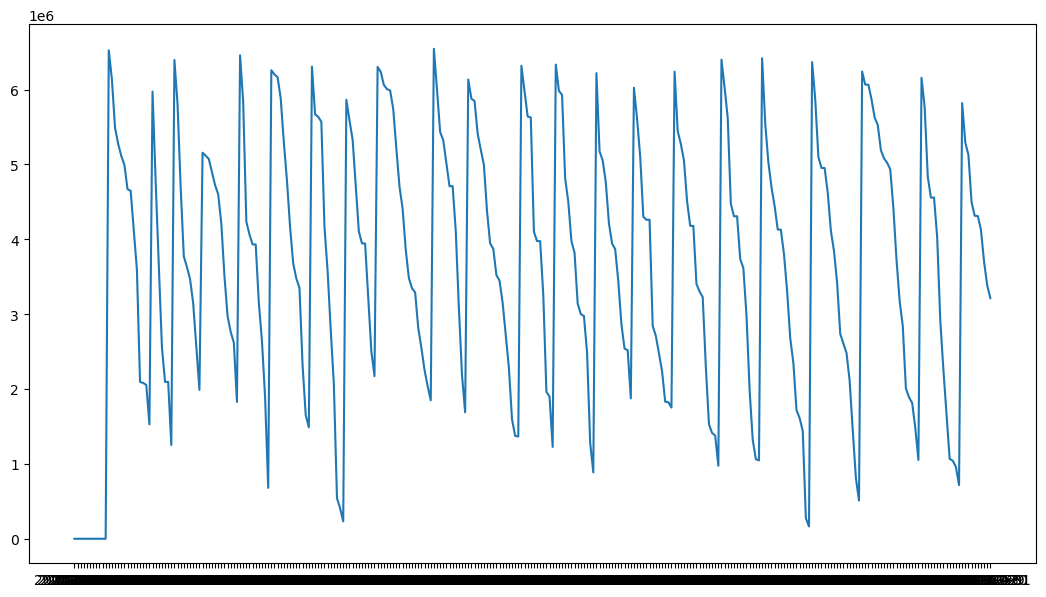

In [22]:
plt.figure(figsize=(13, 7))  # Указываем ширину и высоту графика в дюймах
df1 = transactions[transactions.ATM_ID == "ATM_1"]
plt.plot(df1["date"], df1["bal_end_of_day"], )

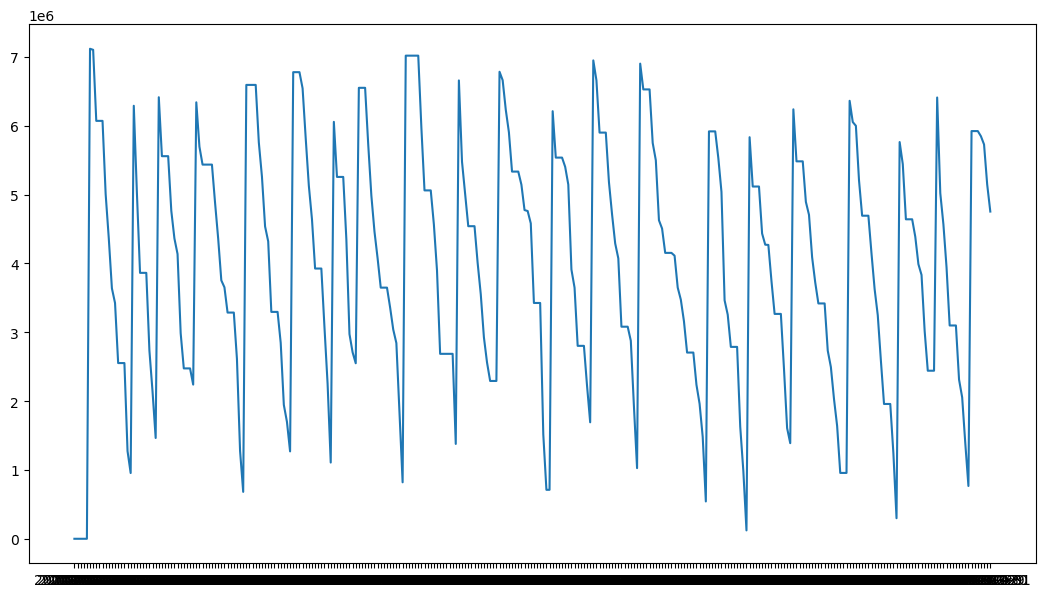

In [23]:
plt.figure(figsize=(13, 7))  # Указываем ширину и высоту графика в дюймах
df2 = transactions[transactions.ATM_ID == "ATM_2"]
plt.plot(df2["date"], df2["bal_end_of_day"], )

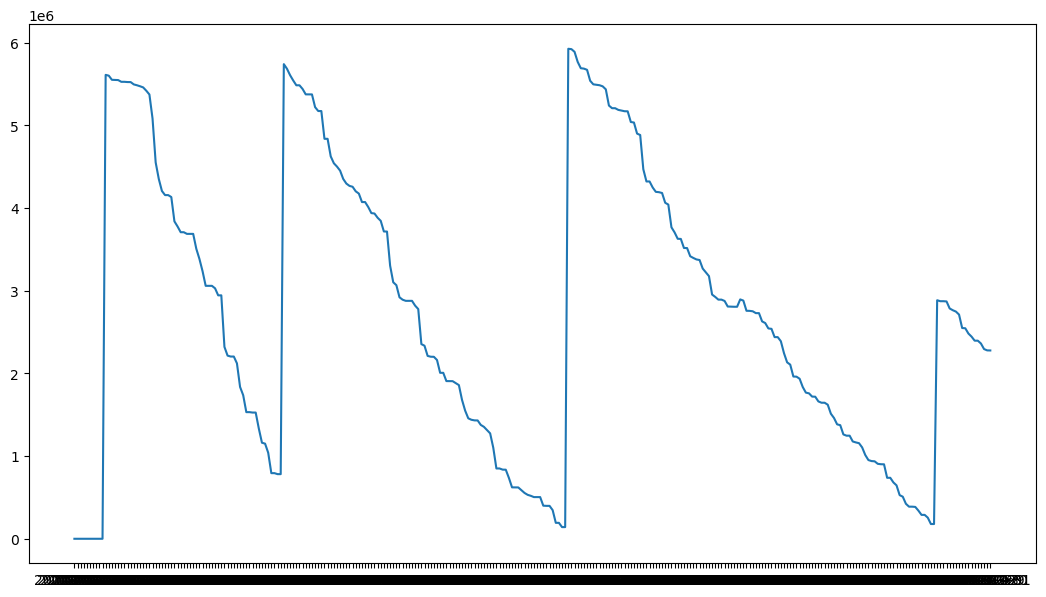

In [24]:
plt.figure(figsize=(13, 7))  # Указываем ширину и высоту графика в дюймах
df3 = transactions[transactions.ATM_ID == "ATM_3"]
plt.plot(df3["date"], df3["bal_end_of_day"], )

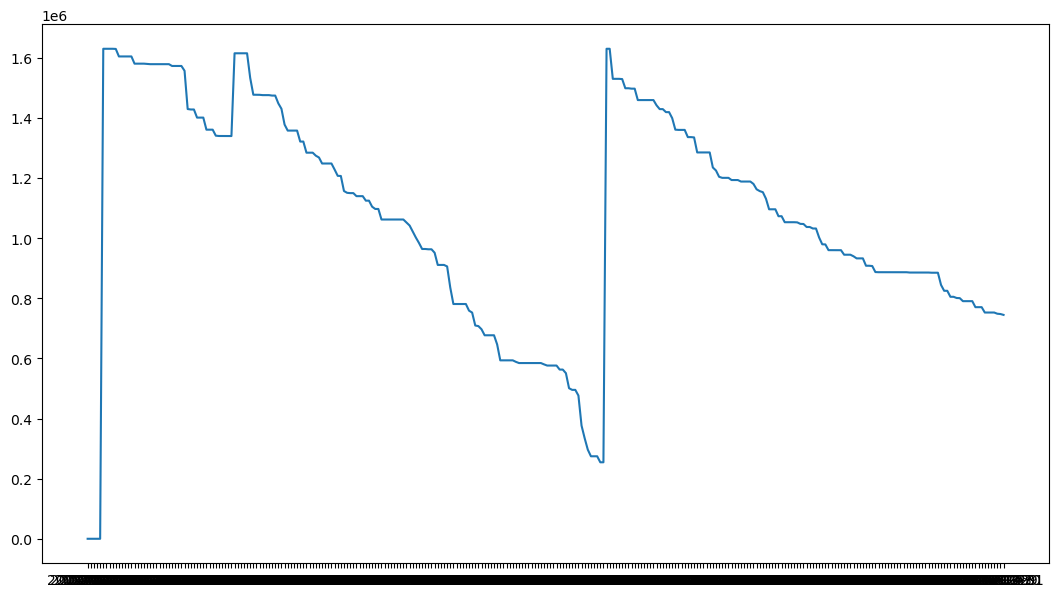

In [25]:
plt.figure(figsize=(13, 7))  # Указываем ширину и высоту графика в дюймах
df4 = transactions[transactions.ATM_ID == "ATM_4"]
plt.plot(df4["date"], df4["bal_end_of_day"], )

# 4 часть

In [26]:
def calculate_order_amount(daily_demand, service_level, lead_time):
    """
    Рассчитать оптимальный размер пополнения и уровень безопасности.
    
    :param daily_demand: Средний дневной спрос
    :param service_level: Уровень сервиса (например, 0.9 для 90%)
    :param lead_time: Время доставки в днях
    :return: Размер пополнения
    """
    mean_demand = daily_demand.mean()
    std_demand = daily_demand.std()
    
    z = norm.ppf(service_level)  # Квантиль нормального распределения
    safety_stock = z * std_demand * np.sqrt(lead_time)
    order_quantity = mean_demand * lead_time + safety_stock
    
    return math.ceil(order_quantity)


In [27]:
def simulate_atm_operations(transactions, fees, service_level=0.9, lead_time=3):
    """
    Симуляция работы банкомата.
    
    :param transactions: Данные транзакций
    :param fees: Тарифы на инкассацию
    :param service_level: Уровень сервиса
    :param lead_time: Задержка доставки
    :return: DataFrame с результатами
    """
    transactions = transactions.copy()
    transactions["order_placed"] = False
    transactions["current_balance"] = 0
    transactions["order_amount"] = 0
    transactions["service_failures"] = 0

    for index, row in transactions.iterrows():
        if index == 0:
            continue  # Пропускаем первый день

        # Обновление текущего баланса
        transactions.loc[index, "current_balance"] = (
            transactions.loc[index - 1, "current_balance"] - row["cash_out"]
        )

        # Если баланс падает ниже определённого уровня, заказываем пополнение
        if transactions.loc[index, "current_balance"] < calculate_order_amount(
            transactions["cash_out"], service_level, lead_time
        ):
            transactions.loc[index, "order_placed"] = True
            transactions.loc[index, "order_amount"] = calculate_order_amount(
                transactions["cash_out"], service_level, lead_time
            )
            transactions.loc[index, "current_balance"] += transactions.loc[
                index, "order_amount"
            ]
            
            

        # Проверка, было ли превышение лимита
        if transactions.loc[index, "current_balance"] < row["cash_out"]:
            transactions.loc[index, "service_failures"] += 1

    return transactions

In [28]:
# Симуляция с оптимизацией
optimized_transactions = simulate_atm_operations(df1.reset_index(drop=True), fees)

# Подсчёт издержек
total_cost = optimized_transactions["order_amount"].sum() * fees.loc[fees["ATM_ID"] == "ATM_1"]["CashDeliveryFixedFee"]
total_failures = optimized_transactions["service_failures"].sum()

print(f"Общие затраты на инкассацию: {total_cost.values}")
print(f"Общее количество случаев, когда клиенту не хватило наличных: {total_failures}")

Общие затраты на инкассацию: [1.61352915e+11]
Общее количество случаев, когда клиенту не хватило наличных: 0


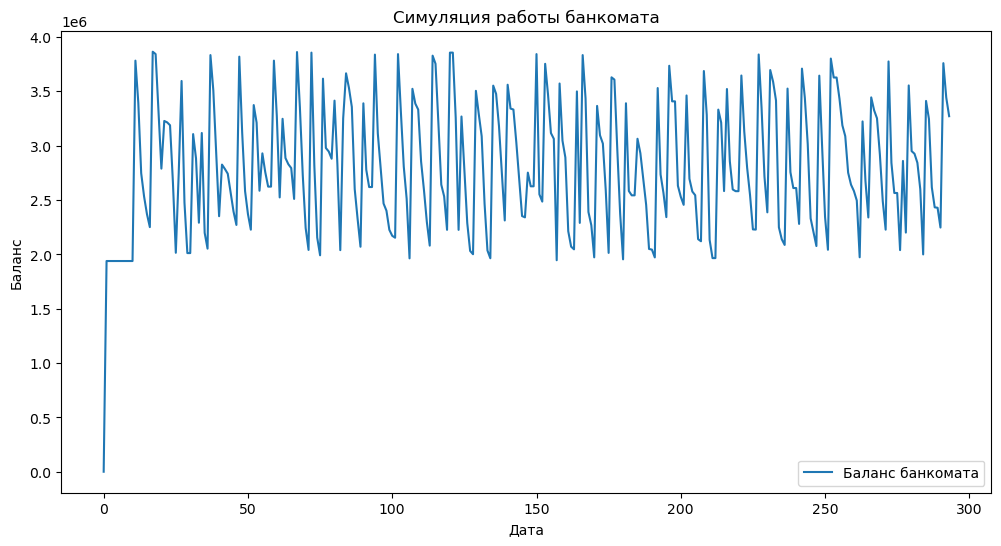

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(optimized_transactions["current_balance"], label="Баланс банкомата")
plt.title("Симуляция работы банкомата")
plt.xlabel("Дата")
plt.ylabel("Баланс")
plt.legend()
plt.show()

Пример для 1ого банкомата